In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scipy.optimize as opt
from scipy.optimize import curve_fit
import os
import re


In [2]:
def powerlaw(t,K,n,Af,tau):
    return Af*(1-np.exp(-K*np.power(t+tau,n)/Af))#/Af))


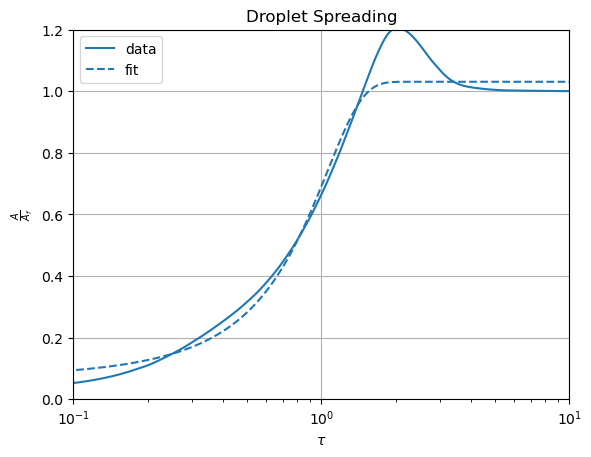

In [3]:
fit_param=np.zeros([1,4])

temp=pd.read_csv('./monitor/dropinfo',header=0,delimiter='\\s+')#,skiprows=1)
data=temp[1:].astype('float32') # Drop first row and interpret data as floating point numbers. 
    # === Plot Data === #
xdata=data['Time'].to_numpy()
ydata=np.pi*np.power(data['Wetted'].to_numpy(),2)
A_f=ydata[-1]
ydata=ydata/A_f
p=plt.semilogx(xdata,ydata,label='data')
    # === Fit model === #
    #popt, pcov = curve_fit(powerlaw, data['Time'], np.pi*np.power(data['Wetted'],2),[1,0.5,1,8])
popt, pcov = curve_fit(powerlaw, xdata, ydata,bounds=(10**-3,[10,10,10,2]))
fit_param[0,:]=popt
p=plt.semilogx(xdata,powerlaw(xdata,popt[0],popt[1],popt[2],popt[3]),'--',color=p[0].get_color(),label='fit')


plt.ylim([0,1.2])
plt.xlim([1e-1,1e1])
plt.title('Droplet Spreading')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\frac{A}{A_f}$')
plt.legend()
plt.grid()#True,which='Both')
plt.show()
    

In [13]:
#K,n,A_f,tau
fit_param

array([[5.58796298e-03, 6.85883586e+00, 9.43060856e+00, 1.99999999e+00]])